In [1]:
import csv
from pandas import read_csv

filename = "RandomForest_deci.csv"

with open(filename, "r") as file:
    reader = csv.reader(file)
    rf_deci = next(reader)

df_deci = read_csv('RandomForest_deci.csv', header=None)

filename = "RandomForest_deci_shuffled.csv"

with open(filename, "r") as file:
    reader = csv.reader(file)
    rf_deci_shuffled = next(reader)

filename = "RandomForest_resp.csv"

with open(filename, "r") as file:
    reader = csv.reader(file)
    rf_resp = next(reader)



In [2]:
import pandas as pd
import ast
import numpy as np
import seaborn as sns
from scipy.ndimage import gaussian_filter
from matplotlib import pyplot as plt

def parse_matrix(element):
    element = element.strip('[]').strip()
    if not element:
        return []
    values = [float(x.strip()) for x in element.split(',') if x.strip()]
    return values

converter = {i: parse_matrix for i in range(0, 2875)}

deci = pd.read_csv("RandomForest_deci.csv", converters=converter, header=None)
df_deci = pd.DataFrame(columns=range(26))
for i in range (26):
    df_deci[i] = deci[i][0]
df_deci['mean'] = df_deci.mean(axis=1)
df_deci['mean_filtered'] = gaussian_filter(df_deci['mean'], sigma=20)

deci_shuffled = pd.read_csv("RandomForest_deci_shuffled.csv", converters=converter, header=None)
df_deci_shuffled = pd.DataFrame(columns=range(26))
for i in range (26):
    df_deci_shuffled[i] = deci_shuffled[i][0]
df_deci_shuffled['mean'] = df_deci_shuffled.mean(axis=1)
df_deci_shuffled['mean_filtered'] = gaussian_filter(df_deci_shuffled['mean'], sigma=20)

resp = pd.read_csv("RandomForest_resp.csv", converters=converter, header=None)
df_resp = pd.DataFrame(columns=range(26))
for i in range (26):
    df_resp[i] = resp[i][0]
df_resp['mean'] = df_resp.mean(axis=1)
df_resp['mean_filtered'] = gaussian_filter(df_resp['mean'], sigma=20)



In [15]:
df_deci_2 = pd.DataFrame()
df_deci_2['subj'] = np.tile(np.arange(26), 2875).reshape(2875, 26).flatten()
df_deci_2['time'] = np.tile(np.arange(2875), 26)


print(df_deci_2)


       subj  time
0         0     0
1         1     1
2         2     2
3         3     3
4         4     4
...     ...   ...
74745    21  2870
74746    22  2871
74747    23  2872
74748    24  2873
74749    25  2874

[74750 rows x 2 columns]


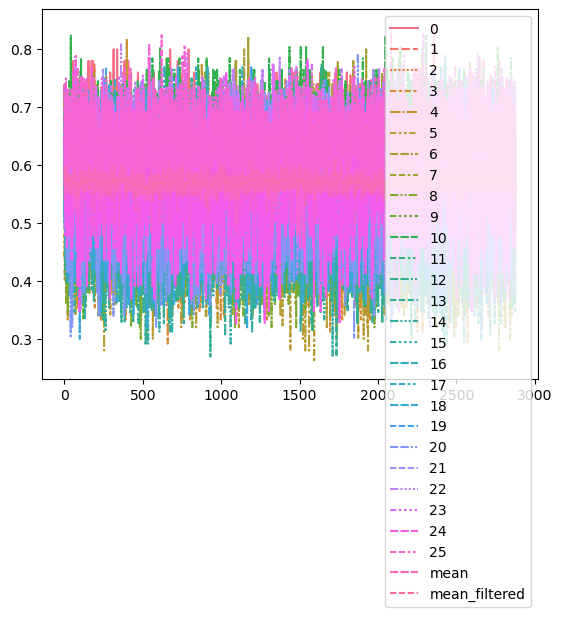

In [8]:
sns.lineplot(df_deci, 
# plt.ylim(0.45,0.65)
plt.show()

In [4]:
'''cell only for reading time labels'''
from toolbox.methods import train_main_ori, read_data

all_epochs, all_rawdata = read_data(amount_of_subjects=1,
                        task='main',
                        resample=False,
                        resample_frequency=20
                        )
time_labels = all_epochs[0].times

(0.45, 0.65)

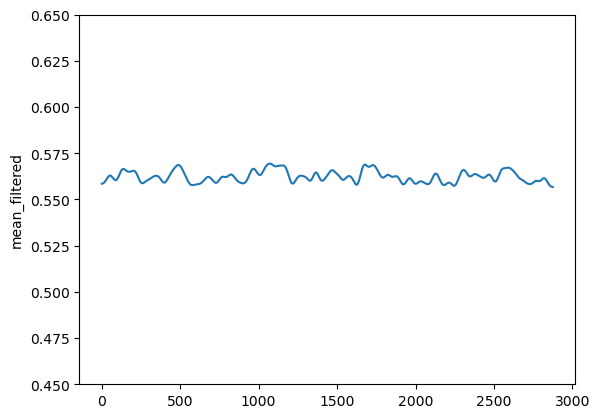

In [5]:
sns.lineplot(df_deci_shuffled['mean_filtered'])
plt.ylim(0.45, 0.65)

(0.45, 0.65)

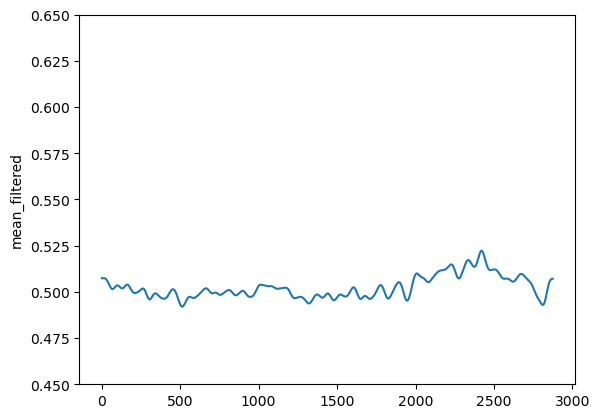

In [6]:
sns.lineplot(df_resp['mean_filtered'])
plt.ylim(0.45,0.65)

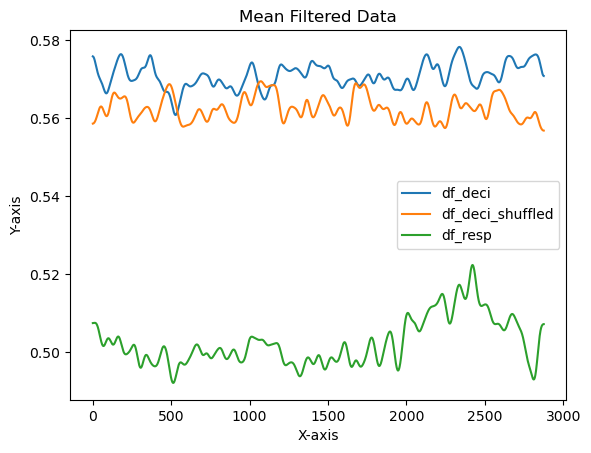

In [7]:

# Plot the lines and label them
sns.lineplot(data=df_deci, x=df_deci.index, y='mean_filtered', label='df_deci')
sns.lineplot(data=df_deci_shuffled, x=df_deci_shuffled.index, y='mean_filtered', label='df_deci_shuffled')
sns.lineplot(data=df_resp, x=df_resp.index, y='mean_filtered', label='df_resp')

# Set plot title and axis labels
plt.title('Mean Filtered Data')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')

# Display the legend
plt.legend()

# Show the plot
plt.show()
